# Correlations!
We are going to go back and use linregress to look for correlations between arsenic and other parameters.  Then we will plot them.....  


This is the hardest stuff we have done.  But we are taking two classes. Take your time and try to understand each step.  I have all the answers at the end.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

Get the data in!!!

In [2]:
df_well_data=pd.read_csv('well_data.csv')

A few notes. Again, pay attention to the details.  Take it slow.  Also, today I am using i again for now. But I switch names later.  Don't let that trip you up.  You control the names!

I want to plot the other elements versus Arsenic and on each graph print the correlation information. so lets first make a nice plot with As on the x-axis.  and Fe on the y-axis using i='Fe'.  

Fe


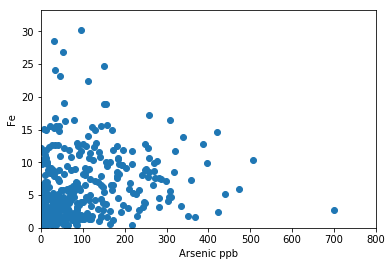

In [3]:
fig,ax=plt.subplots()
i='Fe'
print (i)
if df_well_data[i].dtype==float:
    ax.scatter(df_well_data.As,df_well_data[i])
    ax.set_xlabel('Arsenic ppb')
    ax.set_ylabel(i)
    ax.set_ylim([0,df_well_data[i].max()*1.1])
    ax.set_xlim([0,800])

Now lets add linregress to see the correlations.  This has some tricks.  So we will do it seperately and pull it together.  We want stats.linregess(x,y).  our x is arsenic and our y is represented by i.  Unfortunately this gives us nan or not a number.  

In [10]:
i='Fe'
stats.linregress(df_well_data.As,df_well_data[i])

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

These nan are becuase stats uses all the data.  pandas screens out the nan's when it does math.  So we need to get rid of them.  There is a function dropna().  But we need to drop from when either one or both have an nan.  I think it is easier to make a new dataframe for this.  So take just As and i and put them into a new pandas dataframe called temp.

In [11]:
temp=df_well_data[['As',i]]

In [13]:
print (temp.head())

         As        Fe
0       NaN       NaN
1       NaN       NaN
2       NaN       NaN
3  78.97747  1.260031
4       NaN       NaN


But we still have nan's.  lets make it with Nan dropped.  

In [14]:
temp=df_well_data[['As',i]].dropna()

In [15]:
print (temp.head())

           As         Fe
3   78.977470   1.260031
6   28.070949   1.843156
8   96.885674  11.740445
9   80.627214   8.923465
11  77.006865   6.349396


Now try linregress again but on the new temp! Think about how to reference it! 

In [16]:
i='Fe'
stats.linregress(temp.As,temp[i])

LinregressResult(slope=0.012996899643346863, intercept=4.390525620904394, rvalue=0.25604180950141997, pvalue=1.6310638519922898e-07, stderr=0.0024382468890464413)

### Confession.  
I used to always make a temp array to do linregress.  I think I like doing it one fell swoop to clean up the code.  You can dropna and pass your variables.

In [18]:
i='Fe'
stats.linregress(df_well_data[['As',i]].dropna())

LinregressResult(slope=0.012996899643346863, intercept=4.390525620904394, rvalue=0.25604180950141997, pvalue=1.6310638519922898e-07, stderr=0.0024382468890464413)

Now we are getting close.  Look up help to remember what all the output is.  Then we can write a caption using fancy print formatting.  
-  set results to linregress and you will get a list. 
- Then you can make a textstr 
-  print textstr explaining the results.  
- If you type $r^2$ (This is dollar signs around r^2 to make the math) at some point later on the graphs we will get a real r-squared.  

Here is the linregress link to remind you of the output.  http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

The nice thing with Python 3 is it now gives the names in the output!  Oh life is so easy!

remember to get the results you can do results[0] or results.slope to get the same answer

m=0.013
b=4.391
$r^2$=0.066
p=0.000


Now lets print our one graph with the data.  For these look at our favorite recipes 
http://matplotlib.org/users/recipes.html
and scroll all the way to the bottom.  This is a reminder of what you need to do.  

1.  Make your text string
2.  Make props to give you properties for the box.
3.  pass ax.text and place the box.  

Use your graph from above and add this stuff in.   Plus bring in linregress text string into the same program.  You should almost have all the parts! 

Fe


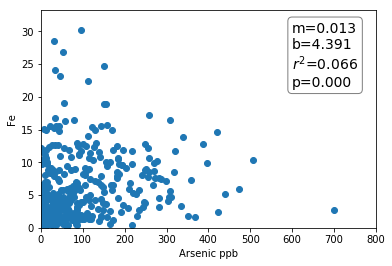

Now we just need to add the best fit line.  You have the m and b from linregress.  I would make an x list that is equal to the min and max of arsenic.  then plot the line.   But a big hint. Since we are using pandas and numpy it works much better to not make x a list but to make x an np.array().  We usually linspace to get our range of values.  But since we are a line you really only need two points and could use np.array([]) or np.linspace()

Fe


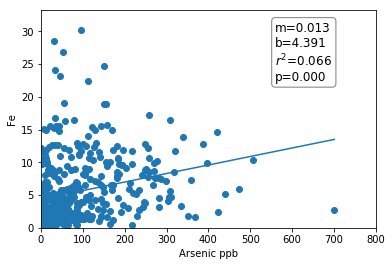

Now we are in great shape.  Lets write it to a file and for loop over all the parameters.  It won't allow you to do As versus As and will crash. so watch out for that!  Also, I can't quite get the textstr to line up nicely. I will work on that some other day

Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


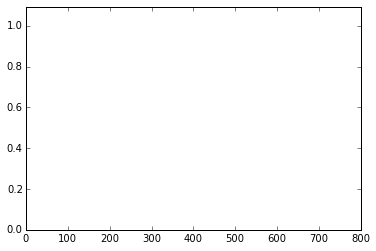

### Great Job.
I just taught you how to p-hack your data.  p-hacking is wrong.  I think Taylor Swift said it correctly.  

They say I did something bad

Then why's it feel so good?


p-hacking is bad but it is what people do! https://bitesizebio.com/31497/guilty-p-hacking/   So as long as you are concious of what you are doing it is sort of ok. You should really start with a hypothesis and then look for correlations.  But it is also alright to explore the data this way.  Just be cognizant of the weaknesses.

But this is great.  we have all the data.  But now we want to take the best 4 or 6 r$^2$ values and plot them on one sheet.  to get the r$^2$ values we could look through all the graphs.  or we can store them and look at them. I don't have a perfect method to do this.  I used to make a dictionary.  But now I think it is easier to make an empty DataFrame and then fill it in.  Here is what I do

1.  Use your last code but add a few lines to save and store the r$^2$ values.  
1.  Make a new empty DataFrame with pd.DataFrame() I call mine df_r2 =pd.DataFrame()
2.  add to the dataframe each time you loop through.  
2.  adding to dataframes by rows is sort of a pain.  
2.  I use .at to add to a dataframe.  you do df.at[index,'column']=value
3.  But the index will be a number of rows that we are counting.  It could be something else but that is what I use.
2.  You will need a way to count.  you can use enumerate or the length of the dataframe.  
2.  We will do these next two steps later.
4.  finally sort the pandas dataframe.
5.  print out the results.  

0 Si
1 P
2 S
3 Ca
4 Fe
5 Ba
6 Na
7 Mg
8 K
9 Mn
10 As
11 Sr
12 F
13 Cl
14 SO4
15 Br


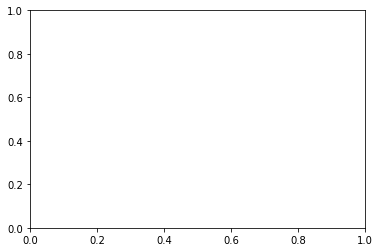

### here is the r$^2$!

In [9]:
df_r2

,r2,name
0,0.037977,Si
1,0.069488,P
2,0.014789,S
3,0.154148,Ca
4,0.065557,Fe
5,0.059968,Ba
6,0.053342,Na
7,0.000824,Mg
8,0.000090,K
9,0.032770,Mn


### Now we need to sort the dataframe.
Here is the link.  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
A key thing is the inplace keyword you have not seen before.  inplace tells it to sort and keep it.  Otherwise it just sorts and shows you and puts it back.  You could also set it to itself.  

In [13]:
df_r2.sort_values(by='r2',ascending=False,inplace=True)

Python doesn't like sorting dictionaries.  So that is why we turn it into a dataframe. I will set the rows to an index and make the column name rsq.  HERE is a problem.  Pandas used to have a function sort. It no longer has it and now it is sort_values

In [14]:
print (df_r2)

          r2 name
10  0.155595   Sr
3   0.154148   Ca
1   0.069488    P
4   0.065557   Fe
5   0.059968   Ba
6   0.053342   Na
0   0.037977   Si
9   0.032770   Mn
13  0.021915  SO4
14  0.018130   Br
2   0.014789    S
12  0.009093   Cl
7   0.000824   Mg
8   0.000090    K
11  0.000030    F


## A mistake from last year was to leave the adding to the df_r2 dataframe in later cells. This messed us up because it kept on getting added to.  

Now lets put our top 4 correlations onto one page!  I will walk you through it.  Grab your plot from above and strip out the file information and the for loop and the dictionary.  It should just be a plot of arsenic versus i.  You can set i='Fe'

Text(0.7,0.95,'m=0.013\nb=4.391\n$r^2$=0.066\np=0.000')

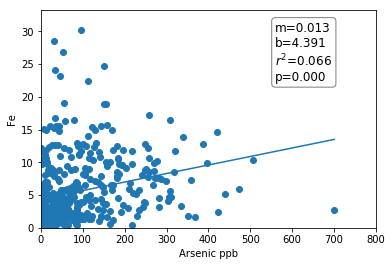

In [16]:
fig,ax=plt.subplots()
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
i='Fe'
ax.scatter(df_well_data.As,df_well_data[i])
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel(i)
ax.set_ylim([0,df_well_data[i].max()*1.1])
ax.set_xlim([0,800])

results=stats.linregress(df_well_data[['As',i]].dropna())
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                        ,results.rvalue**2,results.pvalue)

x=np.array([df_well_data.As.min(),df_well_data.As.max()])
ax.plot(x,results.slope*x+results.intercept)
ax.text(0.7,0.95,textstr,transform=ax.transAxes,fontsize=12\
    ,verticalalignment='top',bbox=props)




We are going to use a for loop like last time.  
-  So lets make a list of elems we want to graph.  
-  Grab the top four r$^2$ elements from above.  
-  make the subplots 2,2 so we can show four graphs.   

You will get an error because ax is a two-d array. 
### You are going to get an error!!

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

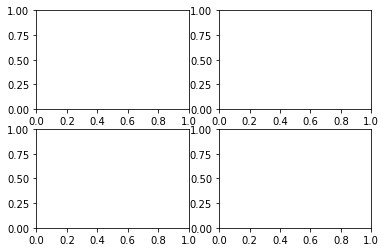

In [28]:
elems=['Sr','Ca','P','Fe']
fig,ax=plt.subplots(2,2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
i='Fe'
ax.scatter(df_well_data.As,df_well_data[i])
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel(i)
ax.set_ylim([0,df_well_data[i].max()*1.1])
ax.set_xlim([0,800])

results=stats.linregress(df_well_data[['As',i]].dropna())
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                        ,results.rvalue**2,results.pvalue)

x=np.array([df_well_data.As.min(),df_well_data.As.max()])
ax.plot(x,results.slope*x+results.intercept)
ax.text(0.7,0.95,textstr,transform=ax.transAxes,fontsize=12\
    ,verticalalignment='top',bbox=props)


### The problem is now your ax is a 2d array!!!!

Where you call ax after the initial value where you set it make it ax[0,0]

there are a few hidden ax calls!



Text(0.7,0.95,'m=0.013\nb=4.391\n$r^2$=0.066\np=0.000')

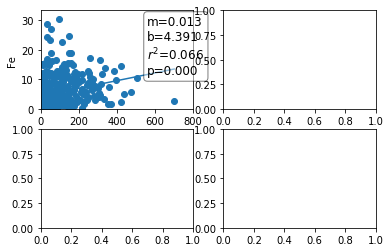

In [29]:
elems=['Sr','Ca','P','Fe']
fig,ax=plt.subplots(2,2)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
i='Fe'
ax[0,0].scatter(df_well_data.As,df_well_data[i])
ax[0,0].set_xlabel('Arsenic ppb')
ax[0,0].set_ylabel(i)
ax[0,0].set_ylim([0,df_well_data[i].max()*1.1])
ax[0,0].set_xlim([0,800])

results=stats.linregress(df_well_data[['As',i]].dropna())
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                        ,results.rvalue**2,results.pvalue)

x=np.array([df_well_data.As.min(),df_well_data.As.max()])
ax[0,0].plot(x,results.slope*x+results.intercept)
ax[0,0].text(0.7,0.95,textstr,transform=ax[0,0].transAxes,fontsize=12\
    ,verticalalignment='top',bbox=props)

That worked nicely. Now go back up and make graph on the next graph over!

Plus make it bigger using fig.set_size_inches(10,10)

Text(0.7,0.95,'m=0.013\nb=4.391\n$r^2$=0.066\np=0.000')

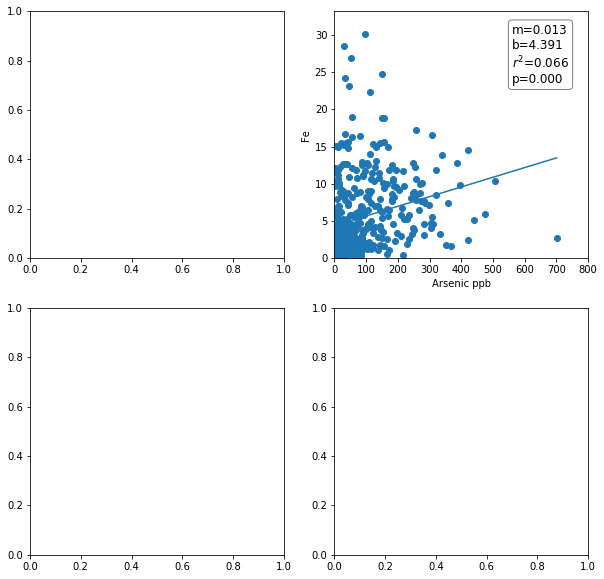

In [32]:
elems=['Sr','Ca','P','Fe']
fig,ax=plt.subplots(2,2)
fig.set_size_inches(10,10)
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
i='Fe'
ax[0,1].scatter(df_well_data.As,df_well_data[i])
ax[0,1].set_xlabel('Arsenic ppb')
ax[0,1].set_ylabel(i)
ax[0,1].set_ylim([0,df_well_data[i].max()*1.1])
ax[0,1].set_xlim([0,800])

results=stats.linregress(df_well_data[['As',i]].dropna())
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                        ,results.rvalue**2,results.pvalue)

x=np.array([df_well_data.As.min(),df_well_data.As.max()])
ax[0,1].plot(x,results.slope*x+results.intercept)
ax[0,1].text(0.7,0.95,textstr,transform=ax[0,1].transAxes,fontsize=12\
    ,verticalalignment='top',bbox=props)

### That worked nicely. 

But we have a problem.  We have our list of 4 elements we want to plot.  But we have a 2x2 matrix to put them into when using ax.

#### confusing!!!!

use the script below to see how the numbering works

Change the nrows and ncols and see what you get!!!!

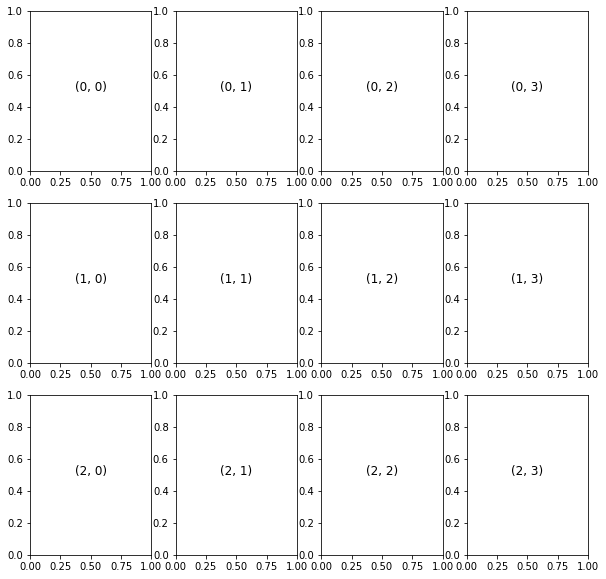

In [41]:
nrows=3
ncols=4

fig,ax=plt.subplots(nrows,ncols)
fig.set_size_inches(10,10)
for i in np.arange(nrows):
    for j in np.arange(ncols):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=12, ha='center')

### Follow me.
this is the hard part.  We have a list of elements. we want plotted.  It is a one-dimensional list with a length.  But we want to put them on a two dimensional array of graphs.  To continue our example above 
-  I am going to set our number of graphs to nrows*ncols  
-  we are going to use np.ravel https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
-  this flattens an array. It takes a 2d array and makes it into a 2d array
-  We can turn ax into a 1d array.

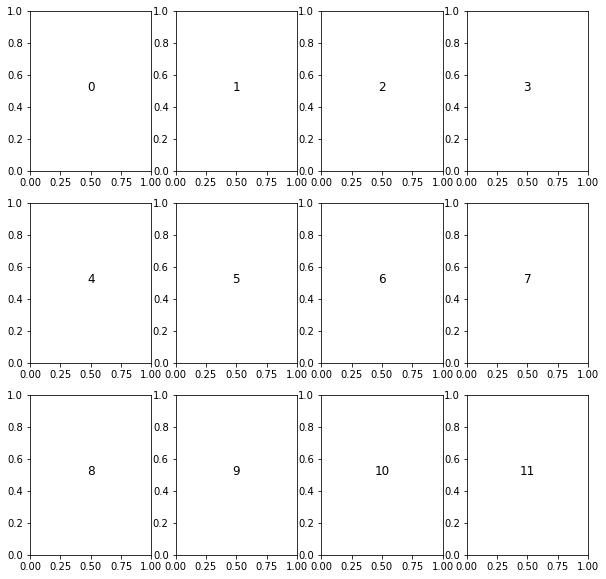

In [42]:
nrows=3
ncols=4
ngraphs=nrows*ncols
fig,ax2d=plt.subplots(nrows,ncols)
fig.set_size_inches(10,10)
ax=np.ravel(ax2d)
for k in np.arange(ngraphs):
    ax[k].text(0.5, 0.5, str((k)),
                      fontsize=12, ha='center')

### Did you see that? Are you still with me?

Remember that we had our list of elements we wanted to plot?  

#### Flashback

Do you remmeber I said we might want to count and give the value of an array?  

Here is my quote from the notes.  

Python has a simple trick to count through a list and give you the list.  It may not make sense now but it will later in the semester!  PAY ATTENTION TO THIS!

and I gave this example



In [43]:
mystrlist=['env','chem','bio','psych']
for i,mystr in enumerate(mystrlist):
    print (i,mystr)

0 env
1 chem
2 bio
3 psych


Can you now do the same thing for our top 4 elements?

0 Sr
1 Ca
2 P
3 Fe


### Can we get these on a graph.  
-  Grab the code from above to alter.
-  Lets start by just printing the names.  
-  add the elems.
-  set your nrows.  I chose 2.
-  set your ncols as len(elems)/nrows. You need to make this an int.  
-  Use enumerate for your for loop.
-  print the number and elem on each graph

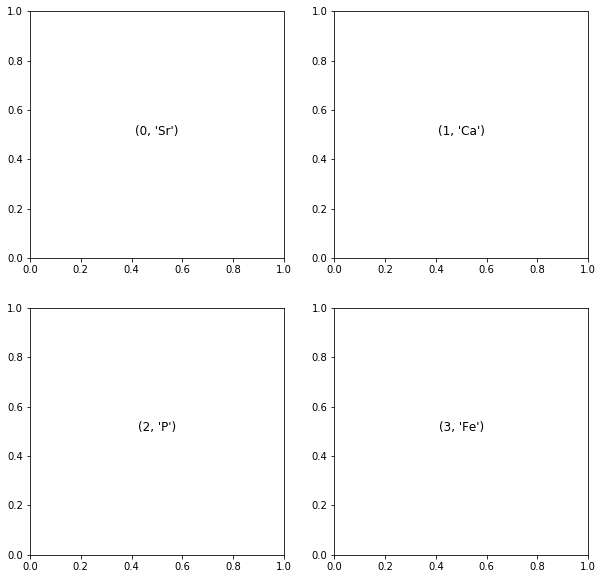

Now go back up and add two more elements to your elems array and see if the graphs update.

### Now you are ready!!!! Can you make these four plots???

If your plots get too scrunched you can add this line after turning on the fig,ax to change whitespace and make it prettier.

A note on a function you might forget is how to get the spacing between graphs to look good. You might not remember that during the arsenic versus depth graphs I needed to add whitespace between the graphs to make them look good. I used this fucntion
fig.subplots_adjust(wspace=0.3)

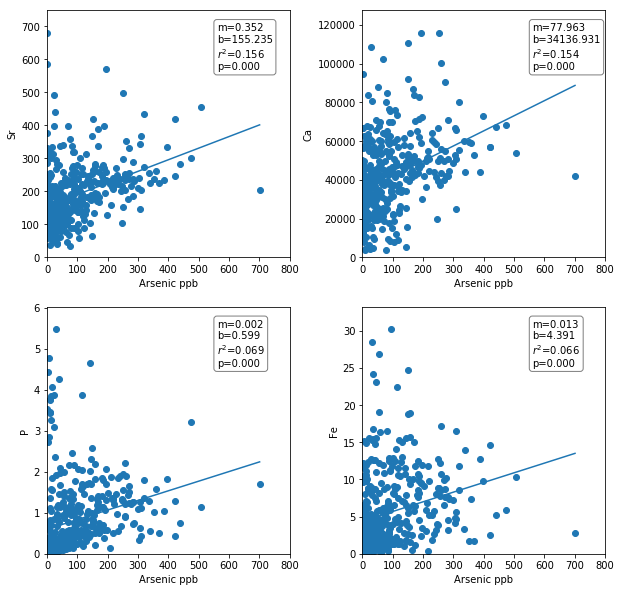

### That is beautiful!  

We are close to making this stand alone. The trouble is if we try a new dataset.  Lets try to get rid of all the hardwires.
-  set df=df_data_well
-  set arsenic to xval
-  change the arsenic range 0,data[xval].max()*1.1
-  change xval to something else to test it. I did Mn
-  Make a filename str to use to save the figure.  I added together the xval and +'correlations.png'
-  Save to a file fig.savefig(filename)

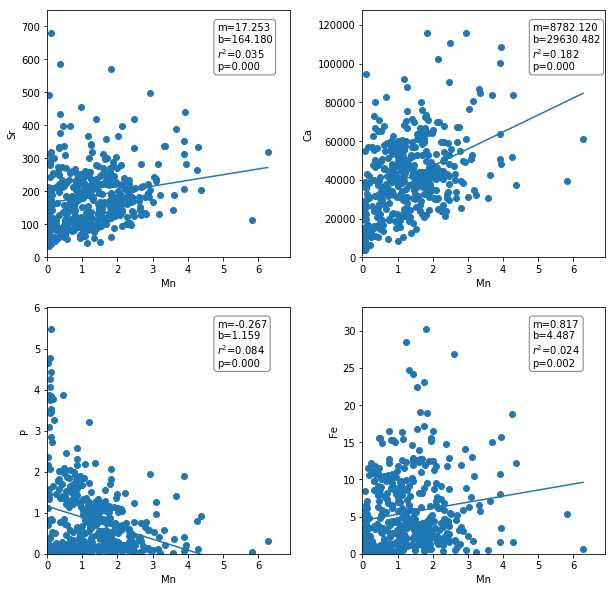

### Can we do six plots?

-  we should be able to just add two more elements to elems!
-  plus I added nice letters to each graph to make nice figure captions
-  you add the letters the same way you add text. 
-  I use the ord function https://docs.python.org/2/library/functions.html#ord and the chr function. https://docs.python.org/2/library/functions.html#chr
-  ord converts a string to the ASCII int and then I add i to it and convert it back with chr

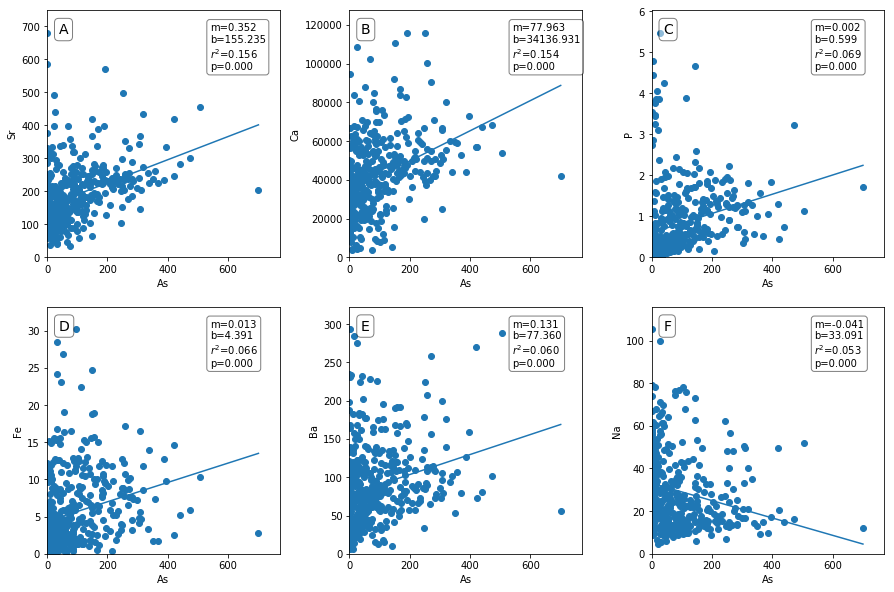

### The last thing we need to do for now.....

Can we automatically grab our top 4 or 6 r$^2$ values?

How? 
-  First go back and get df_r2
-  use enumerate to loop over the name column
-  only loop over the first 6


0 Si
1 P
2 S
3 Ca
4 Fe
5 Ba


## Now incorporate into you graphs
-  use the enumerate loop to choose your elements.
-  instead of using length make a new parameter for number of elements. 
-  Making this a parameter will allow you easily to change the number of elemetns to plot.  you should be able to do 4,6,8 no problem

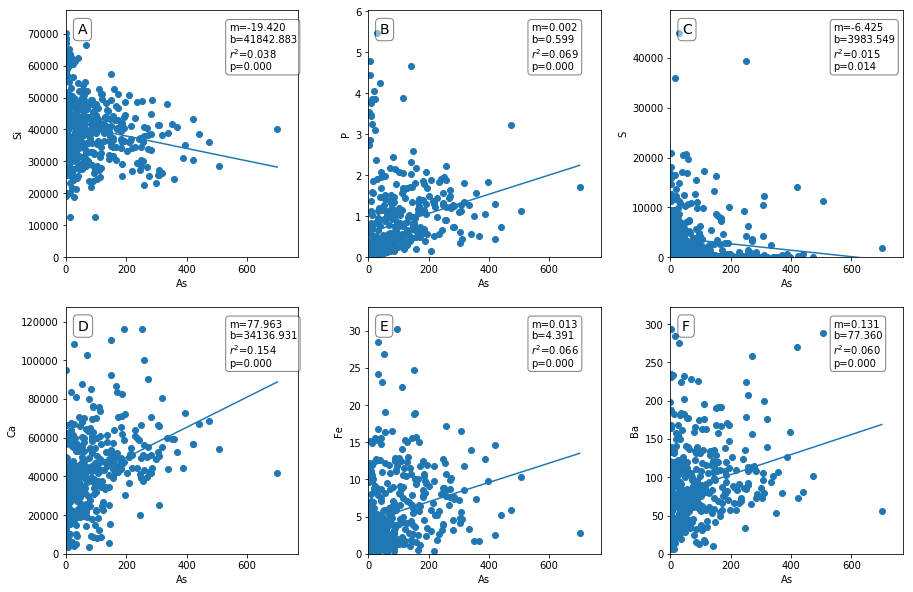

In [84]:
df=df_well_data
xval='As'
num_elems=6
filename=xval+'_correlations.png'

nrows=2
ncols=int(num_elems/nrows)

fig,ax2d=plt.subplots(nrows,ncols)
fig.set_size_inches(15,10)
ax=np.ravel(ax2d)
fig.subplots_adjust(wspace=0.3)

props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(df_r2.name[0:num_elems]):
    ax[i].scatter(df[xval],df[elem])
    ax[i].set_xlabel(xval)
    ax[i].set_ylabel(elem)
    ax[i].set_ylim([0,df[elem].max()*1.1])
    ax[i].set_xlim([0,df[xval].max()*1.1])
    
    results=stats.linregress(df_well_data[[xval,elem]].dropna())
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                            ,results.rvalue**2,results.pvalue)

    x=np.array([df[xval].min(),df[xval].max()])
    ax[i].plot(x,results.slope*x+results.intercept)
    ax[i].text(0.7,0.95,textstr,transform=ax[i].transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)
    ax[i].text(0.05,0.95,chr(i + ord('A')),transform=ax[i].transAxes,fontsize=14,verticalalignment='top',bbox=props)
    
fig.savefig(filename)

### This may not be a good thing.  But you can now officially p-hack and make as many plots of your data as you would like!!!

# ANSWERS

Fe


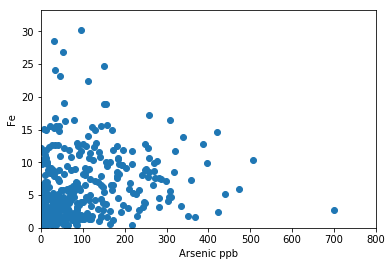

In [9]:
fig,ax=plt.subplots()
i='Fe'
print (i)
if df_well_data[i].dtype==float:
    ax.scatter(df_well_data.As,df_well_data[i])
    ax.set_xlabel('Arsenic ppb')
    ax.set_ylabel(i)
    ax.set_ylim([0,df_well_data[i].max()*1.1])
    ax.set_xlim([0,800])

In [96]:
stats.linregress(temp.iloc[:,0],temp.iloc[:,1])

(-0.040692330044319394,
 33.09115045936845,
 -0.23095799213795859,
 2.4907481251641568e-06,
 0.0085182169944277644)

In [26]:
i='Fe'
results=stats.linregress(df_well_data[['As',i]].dropna())
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                            ,results.rvalue**2,results.pvalue)
print (textstr)

m=0.013
b=4.391
$r^2$=0.066
p=0.000


Fe


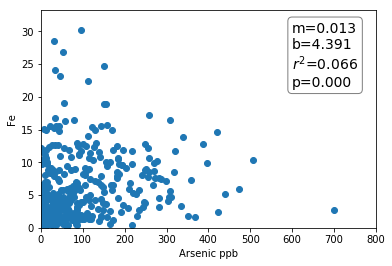

In [21]:
fig,ax=plt.subplots()
i='Fe'
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
print (i)
if df_well_data[i].dtype==float:
    ax.scatter(df_well_data.As,df_well_data[i])
    ax.set_xlabel('Arsenic ppb')
    ax.set_ylabel(i)
    ax.set_ylim([0,df_well_data[i].max()*1.1])
    ax.set_xlim([0,800])
   
    results=stats.linregress(df_well_data[['As',i]].dropna())
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                            ,results.rvalue**2,results.pvalue)
    
    ax.text(0.75,0.95,textstr,transform=ax.transAxes,fontsize=14\
            ,verticalalignment='top',bbox=props)
    

Fe


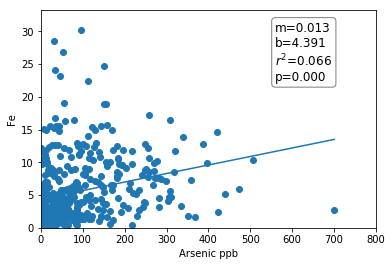

In [19]:
fig,ax=plt.subplots()
i='Fe'
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
print (i)
if df_well_data[i].dtype==float:
    ax.scatter(df_well_data.As,df_well_data[i])
    ax.set_xlabel('Arsenic ppb')
    ax.set_ylabel(i)
    ax.set_ylim([0,df_well_data[i].max()*1.1])
    ax.set_xlim([0,800])
    
    results=stats.linregress(df_well_data[['As',i]].dropna())
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                            ,results.rvalue**2,results.pvalue)
    
    x=np.array([df_well_data.As.min(),df_well_data.As.max()])
    #x=np.linspace(well_data.As.min(),well_data.As.max())
    
    ax.plot(x,results.slope*x+results.intercept)
    
    ax.text(0.7,0.95,textstr,transform=ax.transAxes,fontsize=12\
            ,verticalalignment='top',bbox=props)

Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


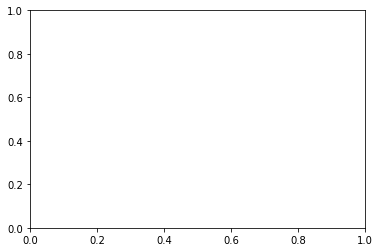

In [22]:
fig,ax=plt.subplots()
pp = PdfPages('As-corr.pdf')
props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i in df_well_data.iloc[:,5:]:
    print (i)
    if df_well_data[i].dtype==float and i!='As':
        ax.scatter(df_well_data.As,df_well_data[i])
        ax.set_xlabel('Arsenic ppb')
        ax.set_ylabel(i)
        ax.set_ylim([0,df_well_data[i].max()*1.1])
        ax.set_xlim([0,800])

        results=stats.linregress(df_well_data[['As',i]].dropna())
        textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                                ,results.rvalue**2,results.pvalue)

        x=np.array([df_well_data.As.min(),df_well_data.As.max()])
        #x=np.linspace(well_data.As.min(),well_data.As.max())

        ax.plot(x,results.slope*x+results.intercept)

        ax.text(0.7,0.95,textstr,transform=ax.transAxes,fontsize=12\
            ,verticalalignment='top',bbox=props)
        pp.savefig()
        ax.cla()

pp.close()

### Answer for putting r$^2$ into a dataframe useing len

Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


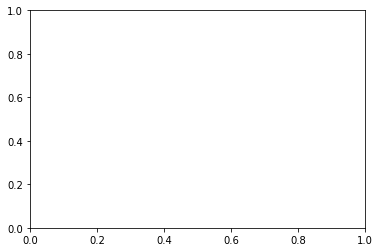

In [23]:
fig,ax=plt.subplots()
pp = PdfPages('As-corr2.pdf')
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
df_r2=pd.DataFrame()

for i in df_well_data.iloc[:,5:]:
    print (i)
    if df_well_data[i].dtype==float and i!='As':
        ax.scatter(df_well_data.As,df_well_data[i])
        ax.set_xlabel('Arsenic ppb')
        ax.set_ylabel(i)
        ax.set_ylim([0,df_well_data[i].max()*1.1])
        ax.set_xlim([0,800])

        results=stats.linregress(df_well_data[['As',i]].dropna())
        textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                                ,results.rvalue**2,results.pvalue)
        index=len(df_r2)
        df_r2.at[index,'r2']=results.rvalue**2
        df_r2.at[index,'name']=i
        x=np.array([df_well_data.As.min(),df_well_data.As.max()])
        #x=np.linspace(well_data.As.min(),well_data.As.max())

        ax.plot(x,results.slope*x+results.intercept)

        ax.text(0.7,0.95,textstr,transform=ax.transAxes,fontsize=12\
            ,verticalalignment='top',bbox=props)
        pp.savefig()
        ax.cla()

pp.close()

### Answer for r$^2$ using enumerate

0 Si
1 P
2 S
3 Ca
4 Fe
5 Ba
6 Na
7 Mg
8 K
9 Mn
10 As
11 Sr
12 F
13 Cl
14 SO4
15 Br


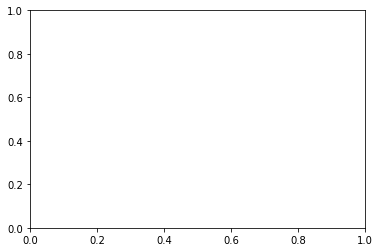

In [24]:
fig,ax=plt.subplots()
pp = PdfPages('As-corr2.pdf')
props=dict(boxstyle='round',facecolor='white',alpha=0.5)
df_r2=pd.DataFrame()

for count,i in enumerate(df_well_data.iloc[:,5:]):
    print (count,i)
    if df_well_data[i].dtype==float and i!='As':
        ax.scatter(df_well_data.As,df_well_data[i])
        ax.set_xlabel('Arsenic ppb')
        ax.set_ylabel(i)
        ax.set_ylim([0,df_well_data[i].max()*1.1])
        ax.set_xlim([0,800])

        results=stats.linregress(df_well_data[['As',i]].dropna())
        textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                                ,results.rvalue**2,results.pvalue)

        df_r2.at[count,'r2']=results.rvalue**2
        df_r2.at[count,'name']=i
        x=np.array([df_well_data.As.min(),df_well_data.As.max()])
        #x=np.linspace(well_data.As.min(),well_data.As.max())

        ax.plot(x,results.slope*x+results.intercept)

        ax.text(0.7,0.95,textstr,transform=ax.transAxes,fontsize=12\
            ,verticalalignment='top',bbox=props)
        pp.savefig()
        ax.cla()

pp.close()

### to four elements

In [86]:
elems=['Sr','Ca','P','Fe']

for i,elem in enumerate(elems):
    print(i,elem)

0 Sr
1 Ca
2 P
3 Fe


### Top four elements on a graph

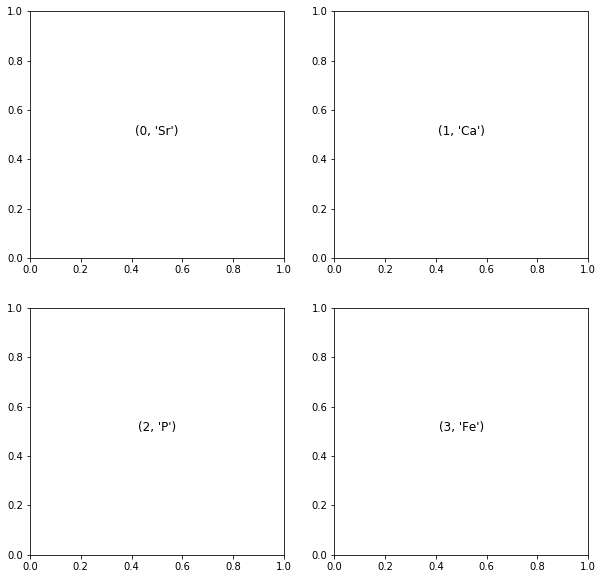

In [87]:
elems=['Sr','Ca','P','Fe']
nrows=2
ncols=int(len(elems)/nrows)

fig,ax2d=plt.subplots(nrows,ncols)
fig.set_size_inches(10,10)
ax=np.ravel(ax2d)

for i,elem in enumerate(elems):
    ax[i].text(0.5, 0.5, str((i,elem)),
                      fontsize=12, ha='center')

### Top four graphs

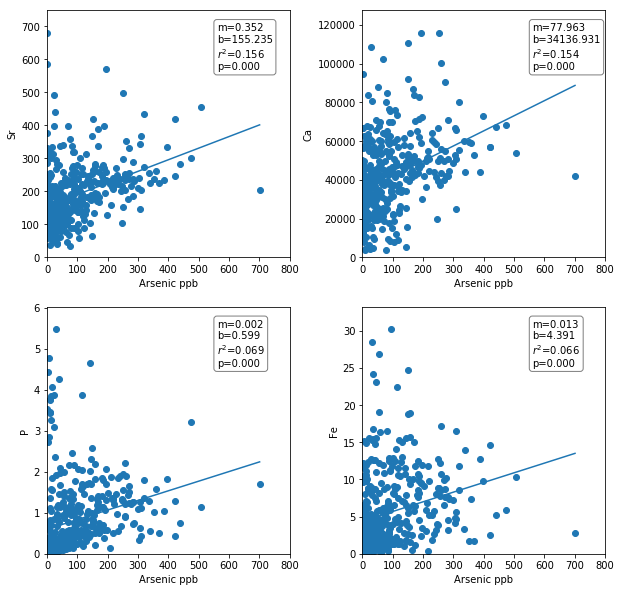

In [54]:
elems=['Sr','Ca','P','Fe']
nrows=2
ncols=int(len(elems)/nrows)

fig,ax2d=plt.subplots(nrows,ncols)
fig.set_size_inches(10,10)
ax=np.ravel(ax2d)
fig.subplots_adjust(wspace=0.3)

props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(elems):
    ax[i].scatter(df_well_data.As,df_well_data[elem])
    ax[i].set_xlabel('Arsenic ppb')
    ax[i].set_ylabel(elem)
    ax[i].set_ylim([0,df_well_data[elem].max()*1.1])
    ax[i].set_xlim([0,800])
    
    results=stats.linregress(df_well_data[['As',elem]].dropna())
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                            ,results.rvalue**2,results.pvalue)

    x=np.array([df_well_data.As.min(),df_well_data.As.max()])
    ax[i].plot(x,results.slope*x+results.intercept)
    ax[i].text(0.7,0.95,textstr,transform=ax[i].transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)

### Cleaned up and with Mn

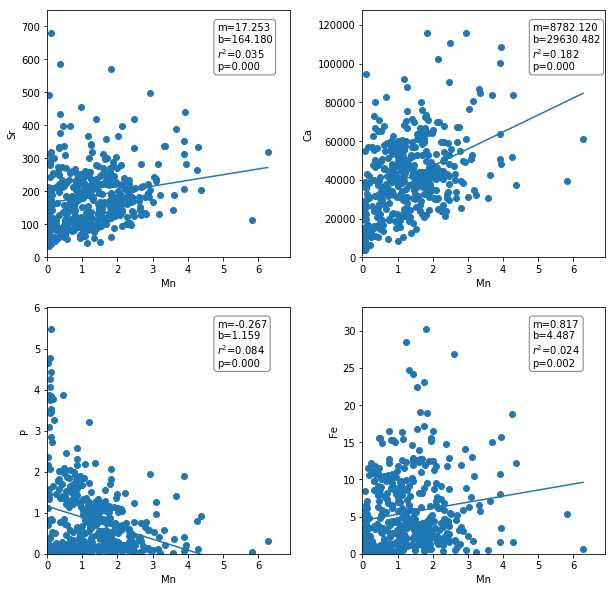

In [62]:
df=df_well_data
xval='Mn'
elems=['Sr','Ca','P','Fe']
filename=xval+'_correlations.png'

nrows=2
ncols=int(len(elems)/nrows)

fig,ax2d=plt.subplots(nrows,ncols)
fig.set_size_inches(10,10)
ax=np.ravel(ax2d)
fig.subplots_adjust(wspace=0.3)

props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(elems):
    ax[i].scatter(df[xval],df[elem])
    ax[i].set_xlabel(xval)
    ax[i].set_ylabel(elem)
    ax[i].set_ylim([0,df[elem].max()*1.1])
    ax[i].set_xlim([0,df[xval].max()*1.1])
    
    results=stats.linregress(df_well_data[[xval,elem]].dropna())
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                            ,results.rvalue**2,results.pvalue)

    x=np.array([df[xval].min(),df[xval].max()])
    ax[i].plot(x,results.slope*x+results.intercept)
    ax[i].text(0.7,0.95,textstr,transform=ax[i].transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)
    
fig.savefig(filename)

### 6 graphs with As

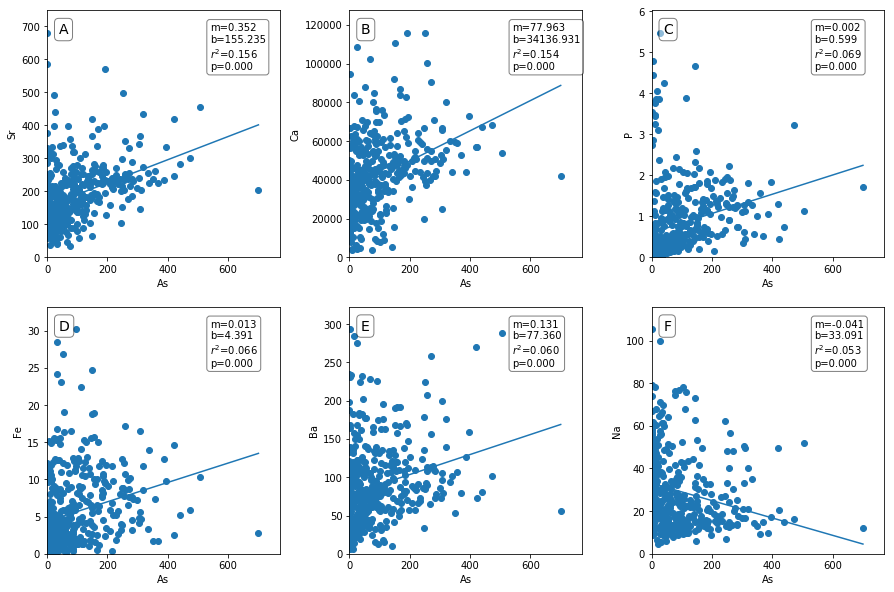

In [70]:
df=df_well_data
xval='As'
elems=['Sr','Ca','P','Fe','Ba','Na']
filename=xval+'_correlations.png'

nrows=2
ncols=int(len(elems)/nrows)

fig,ax2d=plt.subplots(nrows,ncols)
fig.set_size_inches(15,10)
ax=np.ravel(ax2d)
fig.subplots_adjust(wspace=0.3)

props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(elems):
    ax[i].scatter(df[xval],df[elem])
    ax[i].set_xlabel(xval)
    ax[i].set_ylabel(elem)
    ax[i].set_ylim([0,df[elem].max()*1.1])
    ax[i].set_xlim([0,df[xval].max()*1.1])
    
    results=stats.linregress(df_well_data[[xval,elem]].dropna())
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                            ,results.rvalue**2,results.pvalue)

    x=np.array([df[xval].min(),df[xval].max()])
    ax[i].plot(x,results.slope*x+results.intercept)
    ax[i].text(0.7,0.95,textstr,transform=ax[i].transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)
    ax[i].text(0.05,0.95,chr(i + ord('A')),transform=ax[i].transAxes,fontsize=14,verticalalignment='top',bbox=props)
    
fig.savefig(filename)

### Automate r$^2$

In [82]:
for i, elem in enumerate(df_r2.name[0:6]):
    print (i,elem)

0 Si
1 P
2 S
3 Ca
4 Fe
5 Ba


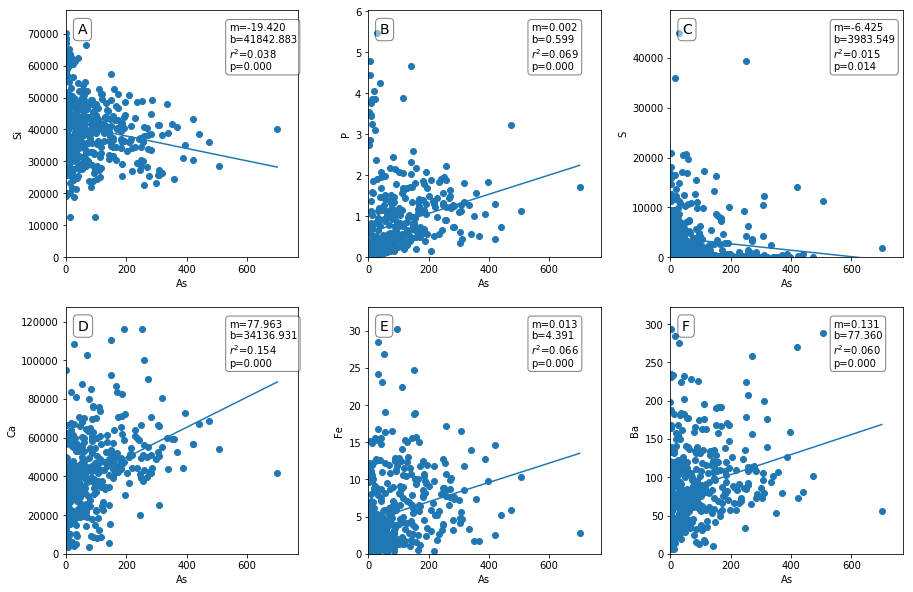

In [85]:
df=df_well_data
xval='As'
num_elems=6
filename=xval+'_correlations.png'

nrows=2
ncols=int(num_elems/nrows)

fig,ax2d=plt.subplots(nrows,ncols)
fig.set_size_inches(15,10)
ax=np.ravel(ax2d)
fig.subplots_adjust(wspace=0.3)

props=dict(boxstyle='round',facecolor='white',alpha=0.5)

for i,elem in enumerate(df_r2.name[0:num_elems]):
    ax[i].scatter(df[xval],df[elem])
    ax[i].set_xlabel(xval)
    ax[i].set_ylabel(elem)
    ax[i].set_ylim([0,df[elem].max()*1.1])
    ax[i].set_xlim([0,df[xval].max()*1.1])
    
    results=stats.linregress(df_well_data[[xval,elem]].dropna())
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.format(results.slope,results.intercept\
                                                            ,results.rvalue**2,results.pvalue)

    x=np.array([df[xval].min(),df[xval].max()])
    ax[i].plot(x,results.slope*x+results.intercept)
    ax[i].text(0.7,0.95,textstr,transform=ax[i].transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)
    ax[i].text(0.05,0.95,chr(i + ord('A')),transform=ax[i].transAxes,fontsize=14,verticalalignment='top',bbox=props)
    
fig.savefig(filename)